In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv(filepath_or_buffer="data/avalanches.csv")
df

RegID  RegionID     RegionName  RegionTypeId RegionTypeName  \
0           0      3001   Svalbard øst            20              B   
1           0      3001   Svalbard øst            20              B   
2           0      3001   Svalbard øst            20              B   
3           0      3001   Svalbard øst            20              B   
4           0      3001   Svalbard øst            20              B   
...       ...       ...            ...           ...            ...   
33598  281883      3035  Vest-Telemark            10              A   
33599  282018      3035  Vest-Telemark            10              A   
33600  282141      3035  Vest-Telemark            10              A   
33601  282256      3035  Vest-Telemark            10              A   
33602  282373      3035  Vest-Telemark            10              A   

       DangerLevel            ValidFrom              ValidTo  \
0                0  2018-01-01T00:00:00  2018-01-01T23:59:59   
1                0  2018-01-02T00:00:00  2018-01-02T23:59:59   
2                0  2018-01-03T00:00:00  2018-01-03T23:59:59   
3                0  2018-01-04T00:00:00  2018-01-04T23:59:59   
4                0  2018-01-05T00:00:00  2018-01-05T23:59:59   
...            ...                  ...                  ...   
33598            1  2021-12-27T00:00:00  2021-12-27T23:59:59   
33599            1  2021-12-28T00:00:00  2021-12-28T23:59:59   
33600            1  2021-12-29T00:00:00  2021-12-29T23:59:59   
33601            2  2021-12-30T00:00:00  2021-12-30T23:59:59   
33602            2  2021-12-31T00:00:00  2021-12-31T23:59:59   

           NextWarningTime              PublishTime  DangerIncreaseTime  \
0      2018-01-01T17:00:00      2018-01-01T00:00:00                 NaN   
1      2018-01-01T17:00:00      2018-01-02T00:00:00                 NaN   
2      2018-01-03T17:00:00      2018-01-03T00:00:00                 NaN   
3      2018-01-03T17:00:00      2018-01-04T00:00:00                 NaN   
4      2018-01-05T17:00:00      2018-01-05T00:00:00                 NaN   
...                    ...                      ...                 ...   
33598  2021-12-28T16:00:00  2021-12-26T15:28:18.613                 NaN   
33599  2021-12-29T16:00:00  2021-12-27T15:28:08.153                 NaN   
33600  2021-12-30T16:00:00   2021-12-28T15:32:18.54                 NaN   
33601  2021-12-31T16:00:00  2021-12-29T15:27:27.127                 NaN   
33602  2022-01-01T16:00:00  2021-12-30T15:37:03.963                 NaN   

       NoName                                           MainText  LangKey  
0         NaN                                       Ikke vurdert        1  
1         NaN                                       Ikke vurdert        1  
2         NaN                                       Ikke vurdert        1  
3         NaN                                       Ikke vurdert        1  
4         NaN                                       Ikke vurdert        1  
...       ...                                                ...      ...  
33598     NaN  Lite snø og generelt stabile forhold, kun muli...        1  
33599     NaN  Lite snø og generelt stabile forhold, kun muli...        1  
33600     NaN  Lite snø og generelt stabile forhold, kun muli...        1  
33601     NaN  Mildvær og regn gir fare for natulig utløste v...        1  
33602     NaN  Mildvær og regn gir fare for natulig utløste v...        1  

[33603 rows x 14 columns]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RegID               33603 non-null  int64  
 1   RegionID            33603 non-null  int64  
 2   RegionName          33603 non-null  object 
 3   RegionTypeId        33603 non-null  int64  
 4   RegionTypeName      33603 non-null  object 
 5   DangerLevel         33603 non-null  int64  
 6   ValidFrom           33603 non-null  object 
 7   ValidTo             33603 non-null  object 
 8   NextWarningTime     33603 non-null  object 
 9   PublishTime         33603 non-null  object 
 10  DangerIncreaseTime  0 non-null      float64
 11  NoName              0 non-null      float64
 12  MainText            33543 non-null  object 
 13  LangKey             33603 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 3.6+ MB


As we can see, There are very few entries with null values. We will remove columns where no values are present

In [53]:
df = df.drop(columns=["DangerIncreaseTime", "NoName"])

We are not going to use the MainText in the analysis, and we do not need the name of regions. Same with date (except when the observation is form):

In [54]:
df = df.drop(columns=["RegionName", "MainText", "ValidFrom", "ValidTo", "NextWarningTime", "LangKey", "RegionTypeName"])
df

RegID  RegionID  RegionTypeId  DangerLevel              PublishTime
0           0      3001            20            0      2018-01-01T00:00:00
1           0      3001            20            0      2018-01-02T00:00:00
2           0      3001            20            0      2018-01-03T00:00:00
3           0      3001            20            0      2018-01-04T00:00:00
4           0      3001            20            0      2018-01-05T00:00:00
...       ...       ...           ...          ...                      ...
33598  281883      3035            10            1  2021-12-26T15:28:18.613
33599  282018      3035            10            1  2021-12-27T15:28:08.153
33600  282141      3035            10            1   2021-12-28T15:32:18.54
33601  282256      3035            10            2  2021-12-29T15:27:27.127
33602  282373      3035            10            2  2021-12-30T15:37:03.963

[33603 rows x 5 columns]

Check if all the columns has the correct datatypes:

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RegID         33603 non-null  int64 
 1   RegionID      33603 non-null  int64 
 2   RegionTypeId  33603 non-null  int64 
 3   DangerLevel   33603 non-null  int64 
 4   PublishTime   33603 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.3+ MB


In [56]:
df["PublishTime"] = pd.to_datetime(df["PublishTime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RegID         33603 non-null  int64         
 1   RegionID      33603 non-null  int64         
 2   RegionTypeId  33603 non-null  int64         
 3   DangerLevel   33603 non-null  int64         
 4   PublishTime   33603 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.3 MB


## Introducing weather dataset
Based on the columns we now have, It is going to be impossible to make any sort of predition. Hence we would have to introduce the weather df_trollheimenset aswell

<Figure size 1000x600 with 0 Axes>

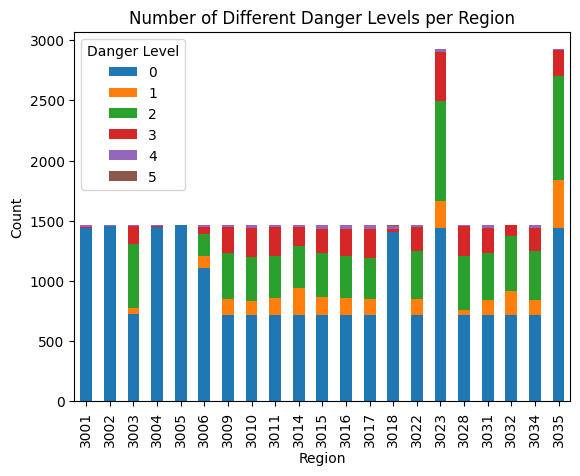

In [57]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
df.groupby('RegionID')['DangerLevel'].value_counts().unstack().plot.bar(stacked=True)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Different Danger Levels per Region')
plt.legend(title='Danger Level')

plt.show()


Hmm, thats weird. Why does region 3023 and 3035 have much more observations than the rest?

This actually indicates that there is something wrong with these regions. After taking a closer look, there are typos in the location_data.py where several regions have the same ID. These would need to be deleted.

In addition we see 3001, 3002, 3004, 3005 and 3018 have much fewer registered observations (the ones that are observed are level 4 or 5). This indicates that these regions are not monitored as much as the other ones. These datapoints will be removed

In [58]:
# Define the region IDs to be removed
region_ids_to_remove = [3001, 3002, 3004, 3005, 3018, 3023, 3035]

# Remove rows with the specified region IDs
df = df[~df['RegionID'].isin(region_ids_to_remove)]


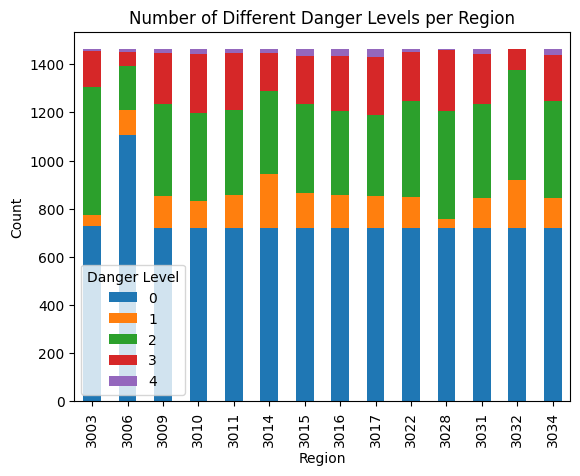

In [59]:
df.groupby('RegionID')['DangerLevel'].value_counts().unstack().plot.bar(stacked=True)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Different Danger Levels per Region')
plt.legend(title='Danger Level')

plt.show()

As we can see, this is much more even. It seems like these are regions which has regular updates (I suspect region 3006 was bumped up to regular updates in the middle of the dataset)

## Looking into more detail for a given region
To get more insights into how the danger level fluctuates over time, it is suitable to look into a specific region and its danger level over time. I will choose region 3022, as it equates to Trollheimen, which is where I ski the most

In [60]:
df_trollheimen = df.loc[df['RegionID'] == 3022].copy()
print(df_trollheimen)

        RegID  RegionID  RegionTypeId  DangerLevel             PublishTime
5110   137929      3022            10            2 2017-12-31 14:55:03.203
5111   138059      3022            10            2 2018-01-01 15:05:52.427
5112   138162      3022            10            2 2018-01-02 15:30:56.043
5113   138319      3022            10            2 2018-01-03 15:50:24.250
5114   138501      3022            10            2 2018-01-04 15:17:44.557
...       ...       ...           ...          ...                     ...
30678  282033      3022            10            3 2021-12-27 10:18:16.430
30679  282040      3022            10            3 2021-12-27 15:28:04.040
30680  282132      3022            10            2 2021-12-28 15:32:13.677
30681  282247      3022            10            3 2021-12-29 15:27:22.570
30682  282364      3022            10            3 2021-12-30 15:36:57.743

[1461 rows x 5 columns]


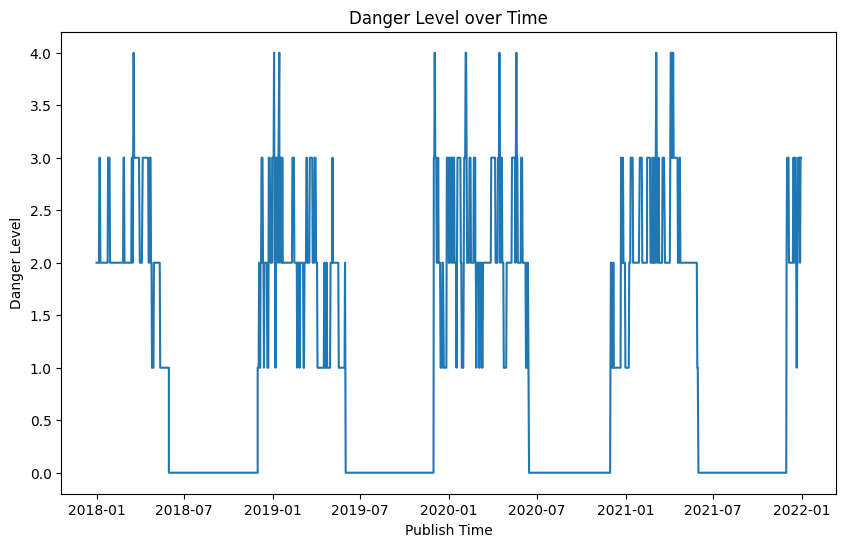

In [61]:
df_trollheimen = df_trollheimen.sort_values("PublishTime")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(df_trollheimen['PublishTime'], df_trollheimen['DangerLevel'])
plt.xlabel('Publish Time')
plt.ylabel('Danger Level')
plt.title('Danger Level over Time')

plt.show()

Okay, this chart may be a bit difficult to interpret, but if we look into seasonality of the temporal data, we can see that in each summer, the DangerLevel is 0. This indicates that level 0 indicates that the region does not have a evaluation for the given time. In the wintertimes, it never hits DangerLevel 0. Now it would be interesting to look into how the DangerLevel fluctuates for a given winter season. Let's look into the 2020/2021 season:

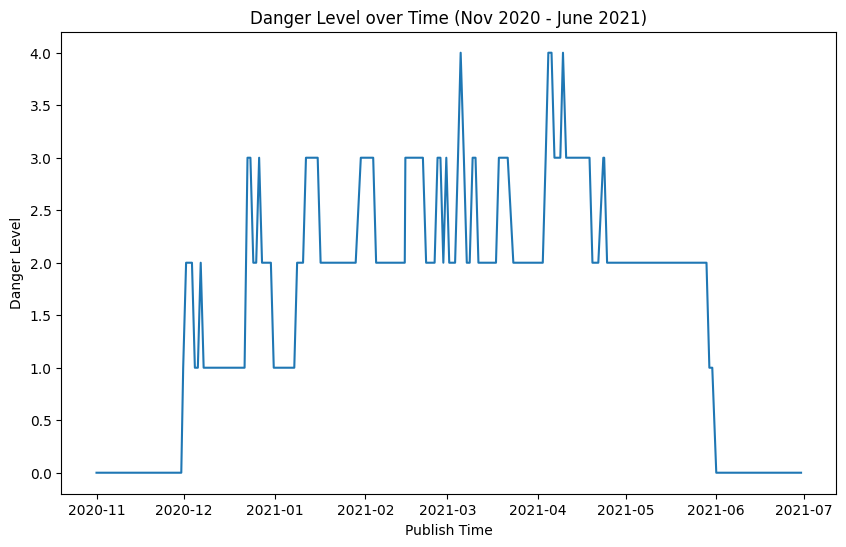

In [62]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2020-11-01')
end_date = pd.to_datetime('2021-06-30')
filtered_data = df_trollheimen[(df_trollheimen['PublishTime'] >= start_date) & (df_trollheimen['PublishTime'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['PublishTime'], filtered_data['DangerLevel'])
plt.xlabel('Publish Time')
plt.ylabel('Danger Level')
plt.title('Danger Level over Time (Nov 2020 - June 2021)')

plt.show()

From what we can see, it seems that a general trend of danger level is that it increases thru the season and stagnates around May. This corresponds to what you might learn in litterature around avalanches. The snow early in the season is not deep enough to constitute large avalanche danger. Around mid season (think january) we will have enough snow, and it is cold enough to create presistent weak layers, which constitute super dangerous and large avalanches. Towards spring, the snow gets wetter, this results in very hard and safe snow early in the morning (because a cold night is going to harden the snowlayers). During the day in spring, the sun will make the snow wetter, this will cause the avalanche danger to rise. A wet avalanche is very dangerous

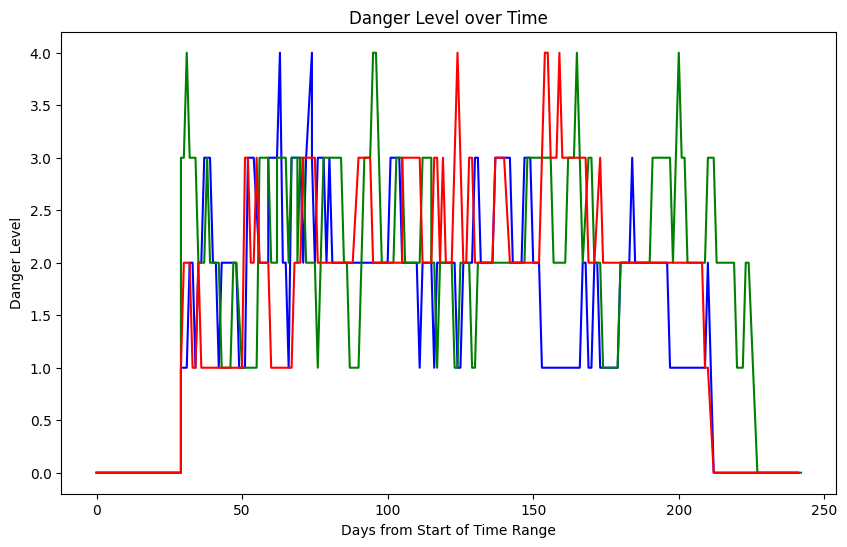

In [63]:
# Define the time ranges
time_ranges = [
    (pd.to_datetime('2018-11-01'), pd.to_datetime('2019-06-30'), 'blue'),
    (pd.to_datetime('2019-11-01'), pd.to_datetime('2020-06-30'), 'green'),
    (pd.to_datetime('2020-11-01'), pd.to_datetime('2021-06-30'), 'red')
]

plt.figure(figsize=(10, 6))

# Plot the line chart for each time range
for start_date, end_date, color in time_ranges:
    filtered_data = df_trollheimen[(df_trollheimen['PublishTime'] >= start_date) & (df_trollheimen['PublishTime'] <= end_date)]
    x_values = (filtered_data['PublishTime'] - start_date).dt.days
    y_values = filtered_data['DangerLevel']
    plt.plot(x_values, y_values, color=color)

plt.xlabel('Days from Start of Time Range')
plt.ylabel('Danger Level')
plt.title('Danger Level over Time')

plt.show()

Ok, this is a bit messy to unpack. It would be nicer to get a trend for each graph and compare them

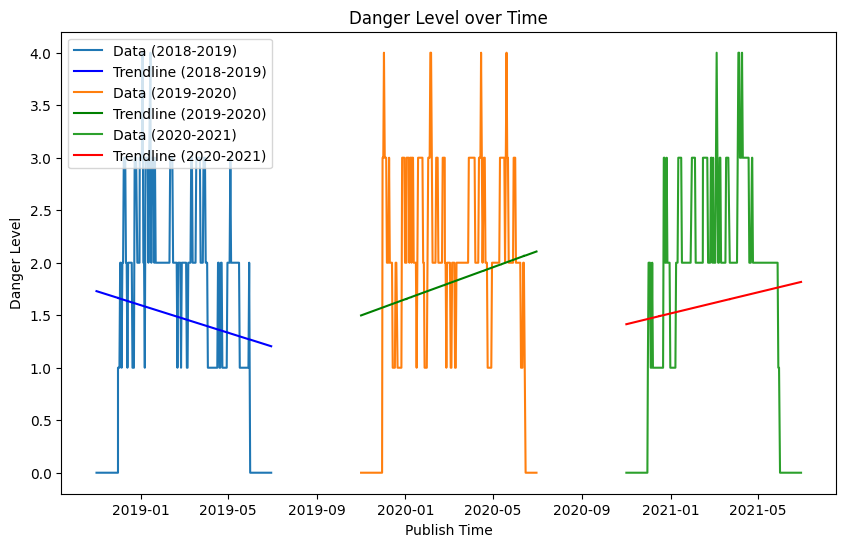

In [64]:

from scipy import stats
import numpy as np

# Define the start and end dates for each year's time range
time_ranges = [
    (pd.to_datetime('2018-11-01'), pd.to_datetime('2019-06-30'), 'blue', '2018-2019'),
    (pd.to_datetime('2019-11-01'), pd.to_datetime('2020-06-30'), 'green', '2019-2020'),
    (pd.to_datetime('2020-11-01'), pd.to_datetime('2021-06-30'), 'red', '2020-2021')
]

plt.figure(figsize=(10, 6))

# Plot the data and trendline for each time range
for start_date, end_date, color, label in time_ranges:
    filtered_data = df_trollheimen[(df_trollheimen['PublishTime'] >= start_date) & (df_trollheimen['PublishTime'] <= end_date)]

    x_days = (filtered_data['PublishTime'] - start_date).dt.days.values
    x = np.arange(len(x_days))
    y = filtered_data['DangerLevel'].values

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    trendline = intercept + slope * x

    plt.plot(filtered_data['PublishTime'], filtered_data['DangerLevel'], label=f'Data ({label})')
    plt.plot(filtered_data['PublishTime'], trendline, label=f'Trendline ({label})', color=color)

plt.xlabel('Publish Time')
plt.ylabel('Danger Level')
plt.title('Danger Level over Time')
plt.legend()

plt.show()

As we can see, there is no specific seasonal trend the data follows. Hence we would need some more sophisticated methods for predicting avalanche danger

# Using weatherdata

In [65]:
weather_df = pd.read_csv("data/weather.csv")
weather_df.head()

latitude  longitutde  elevation        time  region_id  region_name  \
0  79.600006   24.800003      463.0  2018-01-01       3001  Svalbar øst   
1  79.600006   24.800003      463.0  2018-01-02       3001  Svalbar øst   
2  79.600006   24.800003      463.0  2018-01-03       3001  Svalbar øst   
3  79.600006   24.800003      463.0  2018-01-04       3001  Svalbar øst   
4  79.600006   24.800003      463.0  2018-01-05       3001  Svalbar øst   

   temp_2m_max  temp_2m_min  temp_2m_mean  rain_sum  snowfall_sum  \
0        -16.7        -21.6         -19.4       0.0          0.00   
1        -16.8        -22.0         -18.8       0.0          0.21   
2        -17.7        -18.5         -18.0       0.0          0.00   
3        -18.5        -23.4         -21.2       0.0          0.00   
4        -17.0        -20.6         -18.7       0.0          0.00   

   windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  
0                6.3               15.8                          95  
1               27.0               39.6                         355  
2               28.5               41.4                           4  
3               13.6               27.4                           5  
4               22.9               34.2                          35

In [66]:
weather_df["time"] = pd.to_datetime(weather_df["time"]).dt.date
weather_df.head()

latitude  longitutde  elevation        time  region_id  region_name  \
0  79.600006   24.800003      463.0  2018-01-01       3001  Svalbar øst   
1  79.600006   24.800003      463.0  2018-01-02       3001  Svalbar øst   
2  79.600006   24.800003      463.0  2018-01-03       3001  Svalbar øst   
3  79.600006   24.800003      463.0  2018-01-04       3001  Svalbar øst   
4  79.600006   24.800003      463.0  2018-01-05       3001  Svalbar øst   

   temp_2m_max  temp_2m_min  temp_2m_mean  rain_sum  snowfall_sum  \
0        -16.7        -21.6         -19.4       0.0          0.00   
1        -16.8        -22.0         -18.8       0.0          0.21   
2        -17.7        -18.5         -18.0       0.0          0.00   
3        -18.5        -23.4         -21.2       0.0          0.00   
4        -17.0        -20.6         -18.7       0.0          0.00   

   windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  
0                6.3               15.8                          95  
1               27.0               39.6                         355  
2               28.5               41.4                           4  
3               13.6               27.4                           5  
4               22.9               34.2                          35

In [67]:
df['PublishDate'] = pd.to_datetime(df['PublishTime']).dt.date


# Perform the join operation
total_df = weather_df.merge(df, left_on='region_id', right_on='RegionID')
total_df = total_df[total_df['PublishDate'] == total_df['time']]

# Display the merged dataframe
total_df.head()


/tmp/ipykernel_40762/2259162570.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



latitude  longitutde  elevation        time  region_id  \
1         78.0   15.100006      542.0  2018-01-01       3003   
1463      78.0   15.100006      542.0  2018-01-02       3003   
2925      78.0   15.100006      542.0  2018-01-03       3003   
4387      78.0   15.100006      542.0  2018-01-04       3003   
5849      78.0   15.100006      542.0  2018-01-05       3003   

            region_name  temp_2m_max  temp_2m_min  temp_2m_mean  rain_sum  \
1     Nordenskiold Land        -19.3        -23.0         -21.5       0.0   
1463  Nordenskiold Land        -15.7        -20.2         -17.7       0.0   
2925  Nordenskiold Land        -16.6        -19.4         -17.4       0.0   
4387  Nordenskiold Land        -18.8        -24.1         -22.0       0.0   
5849  Nordenskiold Land        -15.3        -19.5         -18.0       0.0   

      snowfall_sum  windspeed_10m_max  windgusts_10m_max  \
1             0.00                6.9               23.8   
1463          0.00                6.0               21.2   
2925          0.00                5.8               17.6   
4387          0.21                9.4               20.9   
5849          1.75               16.4               55.4   

      winddirection_10m_dominant   RegID  RegionID  RegionTypeId  DangerLevel  \
1                             88  138048      3003            10            2   
1463                          53  138151      3003            10            2   
2925                          75  138308      3003            10            2   
4387                         101  138490      3003            10            2   
5849                          72  138640      3003            10            2   

                 PublishTime PublishDate  
1    2018-01-01 15:05:50.190  2018-01-01  
1463 2018-01-02 15:30:54.467  2018-01-02  
2925 2018-01-03 15:50:22.463  2018-01-03  
4387 2018-01-04 15:17:42.117  2018-01-04  
5849 2018-01-05 15:51:44.643  2018-01-05

Lets remove the columns we do not care about

In [68]:
total_df = total_df.drop(columns=["RegID", "RegionID", "RegionTypeId", "region_name", "PublishDate", "PublishTime"])
total_df.head()

latitude  longitutde  elevation        time  region_id  temp_2m_max  \
1         78.0   15.100006      542.0  2018-01-01       3003        -19.3   
1463      78.0   15.100006      542.0  2018-01-02       3003        -15.7   
2925      78.0   15.100006      542.0  2018-01-03       3003        -16.6   
4387      78.0   15.100006      542.0  2018-01-04       3003        -18.8   
5849      78.0   15.100006      542.0  2018-01-05       3003        -15.3   

      temp_2m_min  temp_2m_mean  rain_sum  snowfall_sum  windspeed_10m_max  \
1           -23.0         -21.5       0.0          0.00                6.9   
1463        -20.2         -17.7       0.0          0.00                6.0   
2925        -19.4         -17.4       0.0          0.00                5.8   
4387        -24.1         -22.0       0.0          0.21                9.4   
5849        -19.5         -18.0       0.0          1.75               16.4   

      windgusts_10m_max  winddirection_10m_dominant  DangerLevel  
1                  23.8                          88            2  
1463               21.2                          53            2  
2925               17.6                          75            2  
4387               20.9                         101            2  
5849               55.4                          72            2

In [69]:
print(total_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20441 entries, 1 to 29881832
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   latitude                    20441 non-null  float64
 1   longitutde                  20441 non-null  float64
 2   elevation                   20441 non-null  float64
 3   time                        20441 non-null  object 
 4   region_id                   20441 non-null  int64  
 5   temp_2m_max                 20441 non-null  float64
 6   temp_2m_min                 20441 non-null  float64
 7   temp_2m_mean                20441 non-null  float64
 8   rain_sum                    20441 non-null  float64
 9   snowfall_sum                20441 non-null  float64
 10  windspeed_10m_max           20441 non-null  float64
 11  windgusts_10m_max           20441 non-null  float64
 12  winddirection_10m_dominant  20441 non-null  int64  
 13  DangerLevel                 

In [70]:
import plotly.express as px

# Select the relevant columns for correlation analysis
columns_for_correlation = ['temp_2m_max', 'temp_2m_min', 'temp_2m_mean', 'rain_sum',
                           'snowfall_sum', 'windspeed_10m_max', 'windgusts_10m_max',
                           'winddirection_10m_dominant', 'DangerLevel']

# Subset the dataframe with the selected columns
subset_df = total_df[columns_for_correlation]

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

# Create the correlation heatmap using Plotly
fig = px.imshow(corr_matrix, labels=dict(x="Features", y="Features", color="Correlation"))
fig.update_layout(title="Correlation Chart", width=800, height=600)
fig.show()

This correlation chart is deemed to be a bit bad at actual representing correlation, since the weather now is on the same day as the forecast. However there are some interesting patterns here which we will explore further:
- Negative correlation with temperature 
- Relatively high correlation with snowfall sum

We will now revisit Trollheimen to see how this actually correlates.

In [71]:
df_trollheimen = total_df.loc[total_df['region_id'] == 3022].copy()
df_trollheimen

latitude  longitutde  elevation        time  region_id  \
19210690  62.800003    9.199997     1024.0  2018-01-01       3022   
19212152  62.800003    9.199997     1024.0  2018-01-02       3022   
19213614  62.800003    9.199997     1024.0  2018-01-03       3022   
19215076  62.800003    9.199997     1024.0  2018-01-04       3022   
19216538  62.800003    9.199997     1024.0  2018-01-05       3022   
...             ...         ...        ...         ...        ...   
21339361  62.800003    9.199997     1024.0  2021-12-27       3022   
21339362  62.800003    9.199997     1024.0  2021-12-27       3022   
21340824  62.800003    9.199997     1024.0  2021-12-28       3022   
21342286  62.800003    9.199997     1024.0  2021-12-29       3022   
21343748  62.800003    9.199997     1024.0  2021-12-30       3022   

          temp_2m_max  temp_2m_min  temp_2m_mean  rain_sum  snowfall_sum  \
19210690         -5.6        -12.8         -10.5       0.0          1.05   
19212152         -5.2        -12.5          -7.1       0.0          1.12   
19213614        -11.2        -15.2         -13.3       0.0          0.07   
19215076         -8.9        -10.9          -9.6       0.0          1.68   
19216538         -9.0        -11.6         -10.1       0.0          0.35   
...               ...          ...           ...       ...           ...   
21339361         -8.3        -15.1         -12.5       0.0          0.00   
21339362         -8.3        -15.1         -12.5       0.0          0.00   
21340824        -10.8        -14.9         -13.3       0.0          0.00   
21342286        -11.6        -15.3         -13.3       0.0          0.00   
21343748         -6.0        -14.0         -10.1       0.0          0.98   

          windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  \
19210690                9.4               47.9                         184   
19212152                8.9               29.2                         237   
19213614                9.1               33.1                         182   
19215076                8.4               29.9                         135   
19216538                6.6               28.8                         266   
...                     ...                ...                         ...   
21339361                9.7               31.7                         203   
21339362                9.7               31.7                         203   
21340824               10.3               34.6                         205   
21342286                7.5               27.0                         214   
21343748                9.7               38.9                         218   

          DangerLevel  
19210690            2  
19212152            2  
19213614            2  
19215076            2  
19216538            2  
...               ...  
21339361            3  
21339362            3  
21340824            2  
21342286            3  
21343748            3  

[1460 rows x 14 columns]

In [77]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the dataframe for the desired time period
start_date = pd.to_datetime('2019-11-01')
end_date = pd.to_datetime('2020-06-30')
filtered_df = df_trollheimen[(df_trollheimen['time'] >= start_date) & (df_trollheimen['time'] <= end_date)]

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for snowfall_sum and DangerLevel
fig.add_trace(go.Scatter(x=filtered_df['time'], y=filtered_df['snowfall_sum'], name='Snowfall Sum'),
              secondary_y=False)
fig.add_trace(go.Scatter(x=filtered_df['time'], y=filtered_df['DangerLevel'], name='Danger Level'),
              secondary_y=True)

# Set x-axis label
fig.update_xaxes(title_text='Time')

# Set y-axis labels
fig.update_yaxes(title_text='Snowfall Sum (mm)', secondary_y=False)
fig.update_yaxes(title_text='Danger Level', secondary_y=True)

# Set chart title
fig.update_layout(title='Snowfall and Danger Level (Nov 2019 - Jun 2020)')

# Show the plot
fig.show()


/tmp/ipykernel_40762/48388977.py:7: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



This shows some interesting correlations where the spikes in danger levels occurs sometims when snowfall is high in the region. Now take a look at temperature aswell

In [78]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the dataframe for the desired time period
start_date = pd.to_datetime('2019-11-01')
end_date = pd.to_datetime('2020-06-30')
filtered_df = df_trollheimen[(df_trollheimen['time'] >= start_date) & (df_trollheimen['time'] <= end_date)]

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for snowfall_sum and DangerLevel
fig.add_trace(go.Scatter(x=filtered_df['time'], y=filtered_df['temp_2m_mean'], name='Temperature mean'),
              secondary_y=False)
fig.add_trace(go.Scatter(x=filtered_df['time'], y=filtered_df['DangerLevel'], name='Danger Level'),
              secondary_y=True)

# Set x-axis label
fig.update_xaxes(title_text='Time')

# Set y-axis labels
fig.update_yaxes(title_text='Temperature mean (Celcius)', secondary_y=False)
fig.update_yaxes(title_text='Danger Level', secondary_y=True)

# Set chart title
fig.update_layout(title='Temperature and Danger Level (Nov 2019 - Jun 2020)')

# Show the plot
fig.show()

/tmp/ipykernel_40762/3543877182.py:7: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



Interestingly enough some of the dips in temperature results in higher danger levels. This is however not very consistent, and I would suspect that this might be an indirect correlation based on some other factor. From what I remember avalanche levels do not actually rise when there is low temperatures (actually the opposite happens, as you can see in March of 2020)